## INNOMATICS RESEARCH LABS

### NAME : ALMAS BANU

### DIAMOND PRICE PREDICTION TASK

#### IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

#### Loading Dataset

In [2]:
df = pd.read_csv("dataset/diamonds.csv")

#### Lets Explore the given dataset

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### Number of rows and columns using shape function

In [4]:
df.shape

(53940, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


#### Checking for any null value

In [6]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

#### No null values

In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### Data Visualization

In [8]:
matrix_corr = df.corr()
matrix_corr['price'].sort_values(ascending=False)

price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64

In [9]:
df.query("x==0 or y==0 or z==0")

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


<AxesSubplot:xlabel='price', ylabel='Density'>

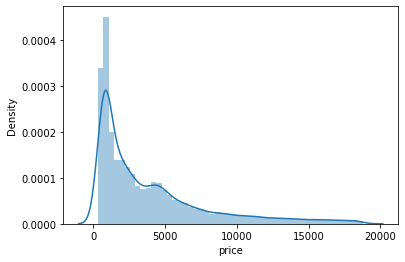

In [10]:
sns.distplot(df.price)

<AxesSubplot:xlabel='carat', ylabel='price'>

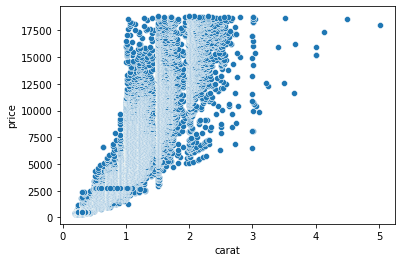

In [11]:
sns.scatterplot(x=df.carat,y=df.price)

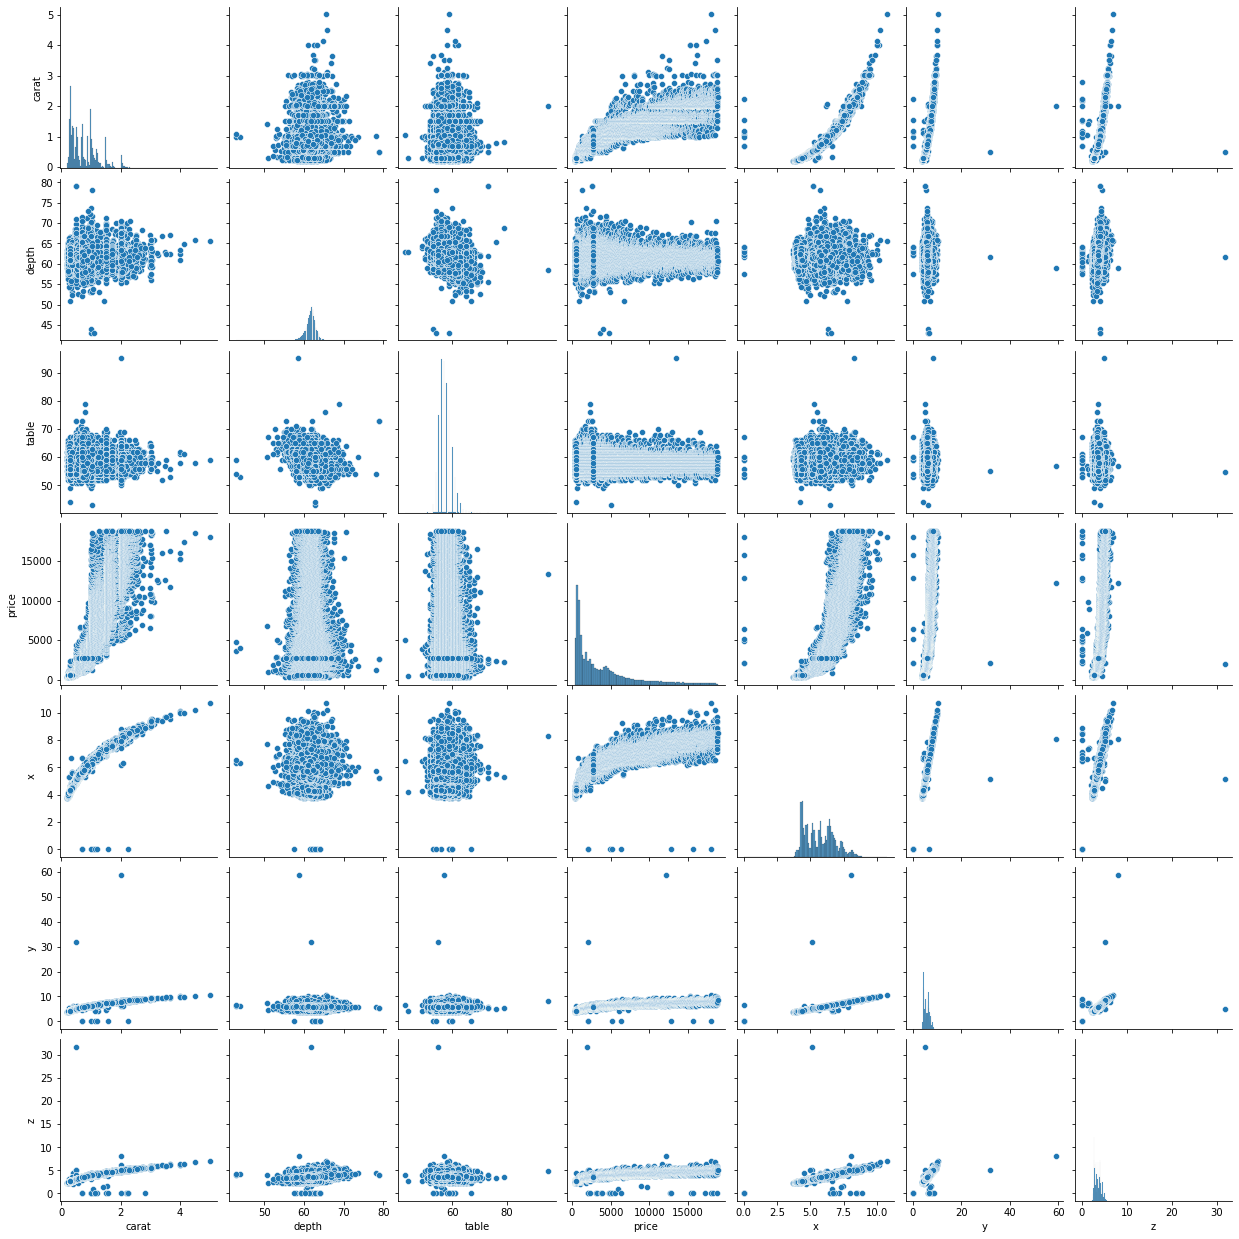

In [12]:
sns.pairplot(df)

#### Outlier detection and removal

In [13]:
df.query("z>10 or y>10")

,carat,cut,color,clarity,depth,table,price,x,y,z
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12


In [14]:
out1 = df.query("z>10 or y>10").index
out1

Int64Index([24067, 25998, 27415, 27630, 48410, 49189], dtype='int64')

In [15]:
df.drop(out1,inplace=True)
df.query("x==0 or y==0 or z==0")

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [16]:
out2 = df.query("x==0 or y==0 or z==0").index
out2

Int64Index([ 2207,  2314,  4791,  5471, 10167, 11182, 11963, 13601, 15951,
            24394, 24520, 26123, 26243, 27112, 27429, 27503, 27739, 49556,
            49557, 51506],
           dtype='int64')

In [17]:
df.drop(out2,inplace=True)

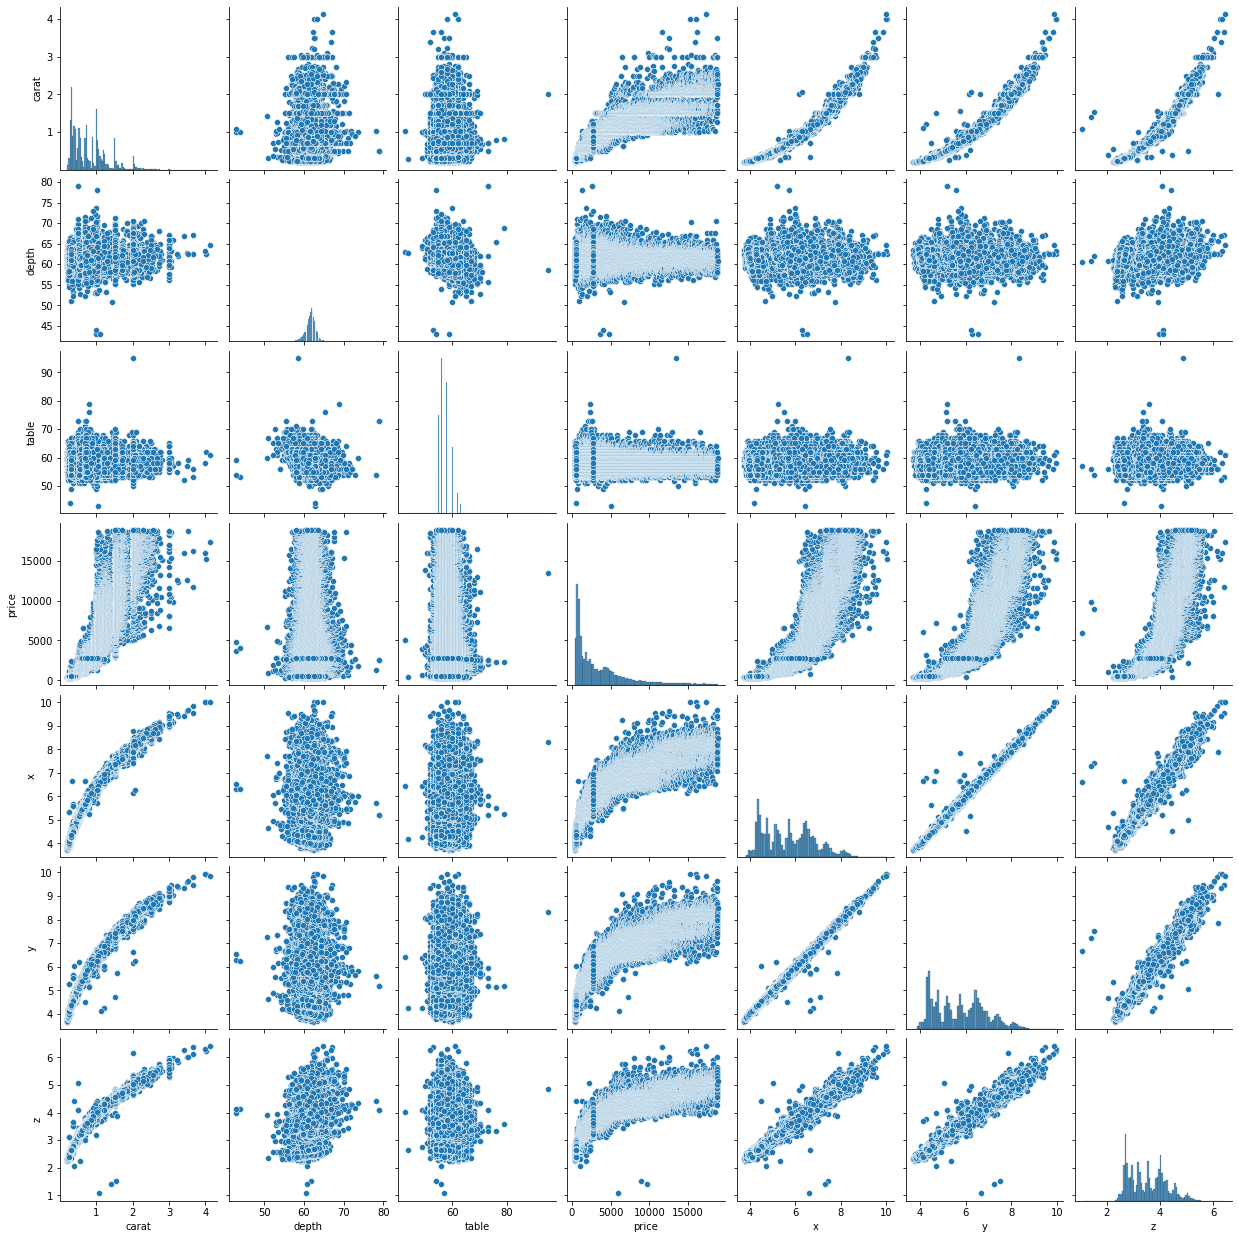

In [18]:
sns.pairplot(df)

In [19]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### Feature Engineering 

#### Replacing x,y and z by volume so that we can take input as volume from user

In [20]:
df['volume'] = df.x*df.y*df.z
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [21]:
df.drop(['x','y','z'],axis=1,inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


#### For categorical columns Creating dummy variables

In [22]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [23]:
df.cut.replace({'Ideal':5,'Premium':4,'Good':3,'Very Good':2,'Fair':1},inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,5,E,SI2,61.5,55.0,326,38.202030
1,0.21,4,E,SI1,59.8,61.0,326,34.505856
2,0.23,3,E,VS1,56.9,65.0,327,38.076885
3,0.29,4,I,VS2,62.4,58.0,334,46.724580
4,0.31,3,J,SI2,63.3,58.0,335,51.917250


In [24]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [25]:
df.color.replace({'E':1,'I':2,'J':3,'H':4,'F':5,'G':6,'D':7},inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,5,1,SI2,61.5,55.0,326,38.202030
1,0.21,4,1,SI1,59.8,61.0,326,34.505856
2,0.23,3,1,VS1,56.9,65.0,327,38.076885
3,0.29,4,2,VS2,62.4,58.0,334,46.724580
4,0.31,3,3,SI2,63.3,58.0,335,51.917250


In [26]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [27]:
df.clarity.replace({'SI2':1,'SI1':2,'VS1':3,'VS2':4,'VVS2':5,'VVS1':6,'I1':7,'IF':8},inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,5,1,1,61.5,55.0,326,38.202030
1,0.21,4,1,2,59.8,61.0,326,34.505856
2,0.23,3,1,3,56.9,65.0,327,38.076885
3,0.29,4,2,4,62.4,58.0,334,46.724580
4,0.31,3,3,1,63.3,58.0,335,51.917250


#### Splitting to Train and Test

In [28]:
X = df.drop(['price'],axis=1)
X.head()

,carat,cut,color,clarity,depth,table,volume
0,0.23,5,1,1,61.5,55.0,38.202030
1,0.21,4,1,2,59.8,61.0,34.505856
2,0.23,3,1,3,56.9,65.0,38.076885
3,0.29,4,2,4,62.4,58.0,46.724580
4,0.31,3,3,1,63.3,58.0,51.917250


In [29]:
y = df['price']
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

#### For numerical columns StandardScaler

In [31]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) Lost after Scaling
# (i.e the dataframe is converted to a numpy ndarray)

X_train_rescaled = pd.DataFrame(scaler.fit_transform(X_train),
                               columns = X_train.columns,
                               index = X_train.index)
X_train_rescaled.head()

,carat,cut,color,clarity,depth,table,volume
30507,-1.030572,0.972148,1.375601,-0.711423,0.873096,-1.106797,-1.029587
53792,-0.607657,0.972148,0.400846,2.683374,0.523081,-1.555525,-0.588917
25773,0.935982,0.972148,1.375601,0.985976,-0.176949,-0.209342,0.959261
40270,-0.903698,-1.399328,-1.548663,-1.277222,-0.106946,-0.658070,-0.899701
45428,-0.544220,0.972148,0.400846,-0.711423,0.033060,-0.658070,-0.544678


In [32]:
scaler.var_,scaler.scale_

(array([2.23642322e-01, 1.60031383e+00, 4.20987783e+00, 3.12374150e+00,
        2.04063896e+00, 4.96631698e+00, 5.82109598e+03]),
 array([ 0.47290837,  1.26503511,  2.05179868,  1.76741096,  1.42850935,
         2.2285235 , 76.29610724]))

In [33]:
X_test_rescaled = pd.DataFrame(scaler.transform(X_test),
                              columns = X_test.columns,
                              index = X_test.index)
X_test_rescaled.head()

,carat,cut,color,clarity,depth,table,volume
26234,1.316606,-1.399328,0.400846,1.551775,-2.347044,2.034296,1.356651
43956,-1.030572,0.972148,0.400846,-0.711423,-0.876980,-0.209342,-1.018323
6686,0.365047,0.181656,0.888223,-1.277222,-0.316955,-0.209342,0.352147
52101,-0.227034,0.972148,0.400846,-0.711423,-0.316955,-1.106797,-0.189978
25466,1.485772,0.181656,0.888223,-0.145623,-0.386958,0.688113,1.470087


#### Lets Check What Models we can apply

#### Linear Regression Model

In [34]:
import sklearn.linear_model as lr
linr = lr.LinearRegression()
linr.fit(X_train_rescaled, y_train)

LinearRegression()

In [35]:
print('R squared of the Linear Regression on training set: {:.2%}'.format(linr.score(X_train_rescaled, y_train)))
print('R squared of the Linear Regression on test set: {:.2%}'.format(linr.score(X_test_rescaled, y_test)))

R squared of the Linear Regression on training set: 87.28%
R squared of the Linear Regression on test set: 87.06%


In [36]:
y_pred = linr.predict(X_test_rescaled)

#### Tree Regressor Model

In [37]:
import sklearn.tree as tr
tree_r = tr.DecisionTreeRegressor(random_state=42)
tree_r.fit(X_train_rescaled, y_train)

DecisionTreeRegressor(random_state=42)

In [38]:
print('R squared of the Decision Tree Regressor on training set: {:.2%}'.format(tree_r.score(X_train_rescaled, y_train)))
print('R squared of the Decision Tree Regressor on test set: {:.2%}'.format(tree_r.score(X_test_rescaled, y_test)))

R squared of the Decision Tree Regressor on training set: 99.99%
R squared of the Decision Tree Regressor on test set: 96.36%


In [39]:
y_pred_new = tree_r.predict(X_test_rescaled)

#### Random Forest Regressor Model

In [40]:
import sklearn.ensemble as se
rf = se.RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_rescaled, y_train)

RandomForestRegressor(random_state=42)

In [41]:
print('R squared of the Random Forest Regressor on training set: {:.2%}'.format(rf.score(X_train_rescaled, y_train)))
print('R squared of the Random Forest Regressor on test set: {:.2%}'.format(rf.score(X_test_rescaled, y_test)))

R squared of the Random Forest Regressor on training set: 99.72%
R squared of the Random Forest Regressor on test set: 98.13%


#### Lets check which model we will apply among 3 

##### Checking for LinearRegression

In [42]:
y_predr = rf.predict(X_test_rescaled)

In [43]:
d = {'Actual': y_test, 'Predicted': y_pred}
df_lr = pd.DataFrame(data=d)
df_lr['Difference'] = df_lr['Predicted']-df_lr['Actual']
df_lr

,Actual,Predicted,Difference
26234,15665,9904.156469,-5760.843531
43956,516,-107.789790,-623.789790
6686,4101,4857.526987,756.526987
52101,2459,3105.950647,646.950647
25466,14234,9666.319538,-4567.680462
...,...,...,...
29521,703,493.629480,-209.370520
2309,3165,4070.855133,905.855133
18013,7287,6169.534882,-1117.465118
38600,1038,1190.970775,152.970775


In [44]:
import sklearn.metrics as sm
print('Mean Absolute Error of the Linear Regression on test set is {:.2f}'.format(sm.mean_absolute_error(y_test,y_pred)))

Mean Absolute Error of the Linear Regression on test set is 918.03


In [45]:
print('Mean Squared Log Error of the Linear Regression on test set is {:.2%}'.format(sm.mean_squared_log_error(y_test,y_pred)))

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

##### Mean Squared Logarithmic Error can't take negative values so we can't use this model to predict. 

##### Checking for DecisionTreeRegressor model

(array([  1.,   0.,   2.,   7.,  17.,  57., 150., 196., 313., 386.]),
 array([-1.93946111e+03, -1.74559720e+03, -1.55173329e+03, -1.35786939e+03,
        -1.16400548e+03, -9.70141569e+02, -7.76277661e+02, -5.82413752e+02,
        -3.88549844e+02, -1.94685935e+02, -8.22026696e-01]),
 <BarContainer object of 10 artists>)

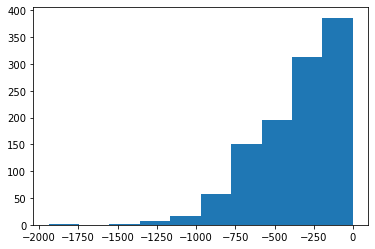

In [46]:
import matplotlib.pyplot as plt
plt.hist(y_pred[y_pred < 0 ])

In [47]:
d = {'Actual': y_test, 'Predicted': y_pred_new}
df_lr = pd.DataFrame(data=d)
df_lr['Difference'] = df_lr['Predicted']-df_lr['Actual']
df_lr

,Actual,Predicted,Difference
26234,15665,17598.0,1933.0
43956,516,663.0,147.0
6686,4101,4101.0,0.0
52101,2459,2806.0,347.0
25466,14234,14105.0,-129.0
...,...,...,...
29521,703,874.0,171.0
2309,3165,3276.0,111.0
18013,7287,6335.0,-952.0
38600,1038,971.0,-67.0


In [48]:
print('Mean Absolute Error of the Decession Tree Regressor on test set is {:.2f}'.format(sm.mean_absolute_error(y_test,y_pred_new)))

Mean Absolute Error of the Decession Tree Regressor on test set is 364.83


In [49]:
print('Mean Squared Log Error of the Decision Tree Regressor on test set is {:.2%}'.format(sm.mean_squared_log_error(y_test,y_pred_new)))

Mean Squared Log Error of the Decision Tree Regressor on test set is 2.22%


##### MSLE is 2.22% for this model.

##### Checking for RandomForestRegressor model

In [50]:
d = {'Actual': y_test, 'Predicted': y_predr}
df_lr = pd.DataFrame(data=d)
df_lr['Difference'] = df_lr['Predicted']-df_lr['Actual']
df_lr

,Actual,Predicted,Difference
26234,15665,14837.371667,-827.628333
43956,516,635.692500,119.692500
6686,4101,3906.571667,-194.428333
52101,2459,2438.270000,-20.730000
25466,14234,13955.717000,-278.283000
...,...,...,...
29521,703,776.655000,73.655000
2309,3165,3206.563333,41.563333
18013,7287,6877.743667,-409.256333
38600,1038,981.420000,-56.580000


In [51]:
print('Mean Absolute Error of the Random Forest Regressor on test set is {:.2f}'.format(sm.mean_absolute_error(y_test,y_predr)))

Mean Absolute Error of the Random Forest Regressor on test set is 282.27


In [52]:
print('Mean Squared Log Error of the Random Forest Regressor on test set is {:.2%}'.format(sm.mean_squared_log_error(y_test,y_predr)))

Mean Squared Log Error of the Random Forest Regressor on test set is 1.32%


##### Both MAE and MSLE are less for this model so we can choose this to predict the price of diamond.

In [54]:
final_model = rf
final_model

RandomForestRegressor(random_state=42)

In [55]:
#Serialization
from pickle import dump
dump(scaler, open('models/scaler.pkl','wb'))
dump(final_model, open('models/model.pkl','wb'))

In [56]:
#Deserialization
from pickle import load
scaler = load(open('models/scaler.pkl','rb'))
final_model = load(open('models/model.pkl','rb'))

In [57]:
print("Enter the Diamond Details")
car = float(input("Enter the carat: "))
cut = float(input("Enter the cut: "))
colr = float(input("Enter the color: "))
clar = float(input("Enter the clarity: "))
dept = float(input("Enter the depth: "))
tabl = float(input("Enter the table: "))
vol = float(input("Enter the volume:"))

query_point = np.array([car,cut,colr,clar,dept,tabl,vol]).reshape(1,-1)
query_point_transformed = scaler.transform(query_point)
prediction = final_model.predict(query_point_transformed)
print("The Price of your diamond is ${:.2f}".format(prediction[0]))

Enter the Diamond Details
Enter the carat: 0.4
Enter the cut: 1
Enter the color: 2
Enter the clarity: 4
Enter the depth: 55
Enter the table: 66.2
Enter the volume:34
The Price of your diamond is $530.00


## THANK YOU